# Loading Important Libraries  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score


# Loading Dataset Train and Test data

In [17]:
# Load dataset
train_path = 'train.csv'
test_path = 'test.csv'
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Exploring Data

In [19]:
# Data Exploration
print("Train Data Info:\n", train_df.info())
print("Test Data Info:\n", test_df.info())
print("Missing Values:\n", train_df.isnull().sum())
print("Survival Rate:\n", train_df['Survived'].value_counts(normalize=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Train Data Info:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null  

# Data Visulization 

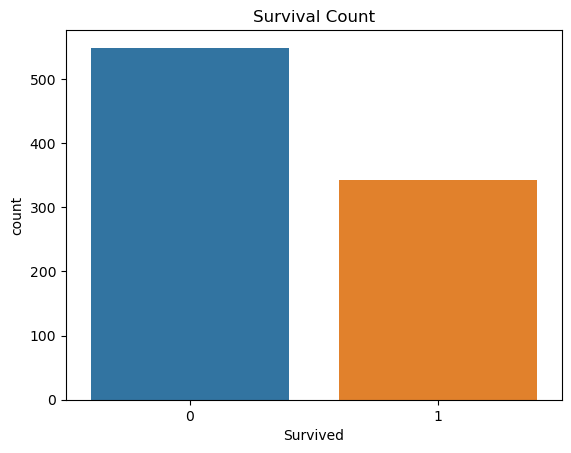

In [21]:
# Data Visualization
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Count')
plt.show()

# Survival Rate of Male and Women

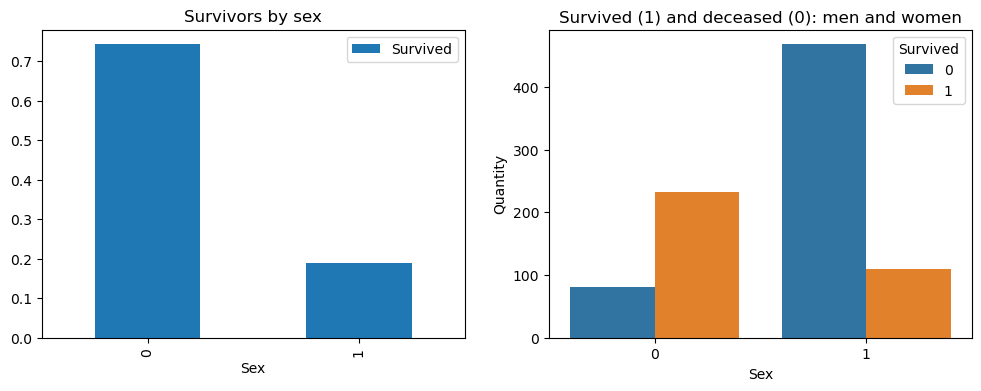

In [77]:
# Analyzing the Impact of Sex on Survival Rates
f, ax = plt.subplots(1, 2, figsize=(12, 4)) 
train_df[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0]) 
ax[0].set_title('Survivors by sex') 
sns.countplot(x='Sex', hue='Survived', data=train_df, ax=ax[1])
ax[1].set_ylabel('Quantity') 
ax[1].set_title('Survived (1) and deceased (0): men and women') 
plt.show()

# Pie Chart of Class Disribution 

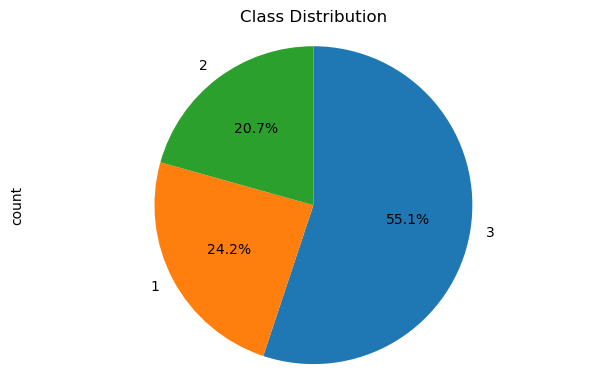

In [24]:
# plots a bar graph of the class distribution
# we have three types of class class 1,2,3
plt.figure(figsize=(12,4))
plt.subplot2grid((1,2),(0,1))
train_df.Pclass.value_counts(sort=False).plot(kind='pie', title='Class Distribution', \
                                        autopct='%1.1f%%', counterclock=False, \
                                        startangle=90).axis('equal')
plt.tight_layout()
plt.show()

# Data Cleaning and Preprocessing 

In [47]:
# Data Cleaning & Preprocessing
imputer = SimpleImputer(strategy='median')
train_df['Age'] = imputer.fit_transform(train_df[['Age']])
test_df['Age'] = imputer.transform(test_df[['Age']])

train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

# Convert categorical variables to numerical before correlation analysis

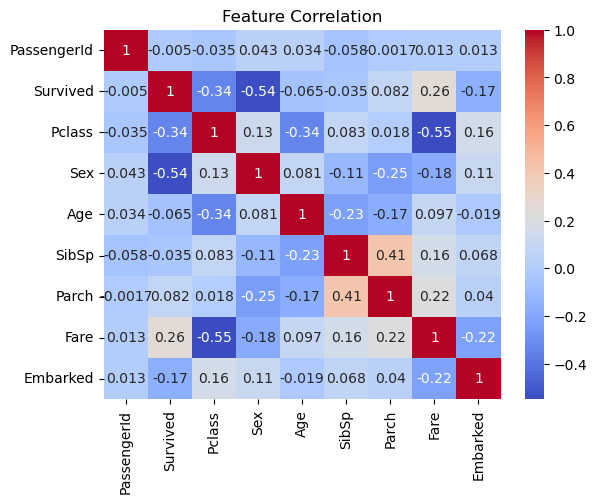

In [57]:
# Convert categorical variables to numerical using LabelEncoder
train_df_encoded = train_df.copy()
train_df_encoded['Sex'] = LabelEncoder().fit_transform(train_df_encoded['Sex'])
train_df_encoded['Embarked'] = LabelEncoder().fit_transform(train_df_encoded['Embarked'].astype(str))
train_df_encoded.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True, errors='ignore')

sns.heatmap(train_df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

In [114]:
## Sex vs Survived (-0.54)→ Strong negative correlation. This means that males had a significantly lower survival rate than females.

In [ ]:
## Pclass vs Survived (-0.34)→ Moderate negative correlation. Higher-class passengers had a better survival rate.

In [ ]:
## Fare vs Survived (0.26)→ Positive correlation. Higher ticket fares were associated with better survival chances.

In [ ]:
## Age vs Survived (-0.065)→ Very weak negative correlation. Older passengers had slightly lower survival chances, but the rel

In [85]:
# Encode categorical variables
encoder = LabelEncoder()
train_df['Sex'] = encoder.fit_transform(train_df['Sex'])
test_df['Sex'] = encoder.transform(test_df['Sex'])
train_df['Embarked'] = encoder.fit_transform(train_df['Embarked'])
test_df['Embarked'] = encoder.transform(test_df['Embarked'])

# Feature Selection using SelectKBest and Train Test Split

In [35]:
# Feature Selection using SelectKBest
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_df[features]
y = train_df['Survived']
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=5)
X_selected = selector.fit_transform(X, y)
selected_features = [features[i] for i in selector.get_support(indices=True)]
print("Selected Features:", selected_features)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


Selected Features: ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']


# Model Training 

In [110]:
# Model Training
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'\n{name} Model Performance:')
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
    print('Classification Report:\n', classification_report(y_test, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))


Logistic Regression Model Performance:
Accuracy: 0.8101
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Confusion Matrix:
 [[90 15]
 [19 55]]

Decision Tree Model Performance:
Accuracy: 0.7877
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       105
           1       0.74      0.76      0.75        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

Confusion Matrix:
 [[85 20]
 [18 56]]

Random Forest Model Performance:
Accuracy: 0.8268
Classification Report:
               precision    recall  f1-s

# Model Training with Cross-Validation and Evaluation Metrics

In [94]:
best_model = None
best_score = 0
best_model_instance = None 

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    scores = cross_val_score(model, X_selected, y, cv=5)
    test_acc = accuracy_score(y_test, y_pred)
    mean_score = np.mean(scores)
    test_acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else "N/A"
    
    print(f'\n{name} Model Performance:')
    print(f'Cross-Validation Accuracy: {np.mean(scores):.4f}')
    print(f'Test Accuracy: {test_acc:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'ROC-AUC Score: {roc_auc}')
    print('Classification Report:\n', classification_report(y_test, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    
    if mean_score > best_score:
        best_score = mean_score
        best_model = name
        best_model_instance = model

print(f'\nBest Model: {best_model} with Cross-Validation Accuracy: {best_score:.4f}')



Logistic Regression Model Performance:
Cross-Validation Accuracy: 0.7823
Test Accuracy: 0.8101
F1 Score: 0.7639
ROC-AUC Score: 0.8823680823680824
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Confusion Matrix:
 [[90 15]
 [19 55]]

Decision Tree Model Performance:
Cross-Validation Accuracy: 0.7823
Test Accuracy: 0.7765
F1 Score: 0.7368
ROC-AUC Score: 0.7985842985842985
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.81       105
           1       0.72      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78    

# Predicting on Test Dataset

In [67]:
# Prediction on Test Data
test_df_selected = test_df[features]  # Ensure test data has the same features as training data
test_selected = selector.transform(test_df_selected)
test_predictions = best_model_instance.predict(test_selected)

# Display and Save Prediction

In [104]:
# Display Predictions
print("Survival Predictions:")
print(submission.head())
print("Predictions saved to Titanic_Survival_Classification.csv")


Survival Predictions:
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         1
4          896         1
Predictions saved to Titanic_Survival_Classification.csv


In [106]:
# Save Predictions
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': test_predictions
})
submission.to_csv('Titanic_Survival_Classification.csv', index=False)
print("Predictions saved to Titanic_Survival_Classification.csv")

Predictions saved to Titanic_Survival_Classification.csv
